In [13]:
using CSV
using DataFrames
using CairoMakie
# Read the CSV file
df = CSV.File("Z_GR_NPHI_RHOB_CALI.txt",delim=',', ignorerepeated=true) |> DataFrame

# Convert columns
z = df[:, 1] .* 0.0003048  # Convert to kilometers
γ = df[:, 2]
ϕ = df[:, 3]
δ = df[:, 4]
cali = df[:, 5]
n = length(γ)

3201

In [14]:
σ = 0.5


v̄ = 5.654 .- 0.008 .* γ
n_x = 1000
v_maxtrix = zeros(n, n_x)
v = LinRange(3, 7, n_x)
for i in 1:n
    v_maxtrix[i, :] .= v
end
g_v = 1/(σ * √(2π)) .* exp.(-0.5*(v_maxtrix.-v̄).^2 ./σ^2);


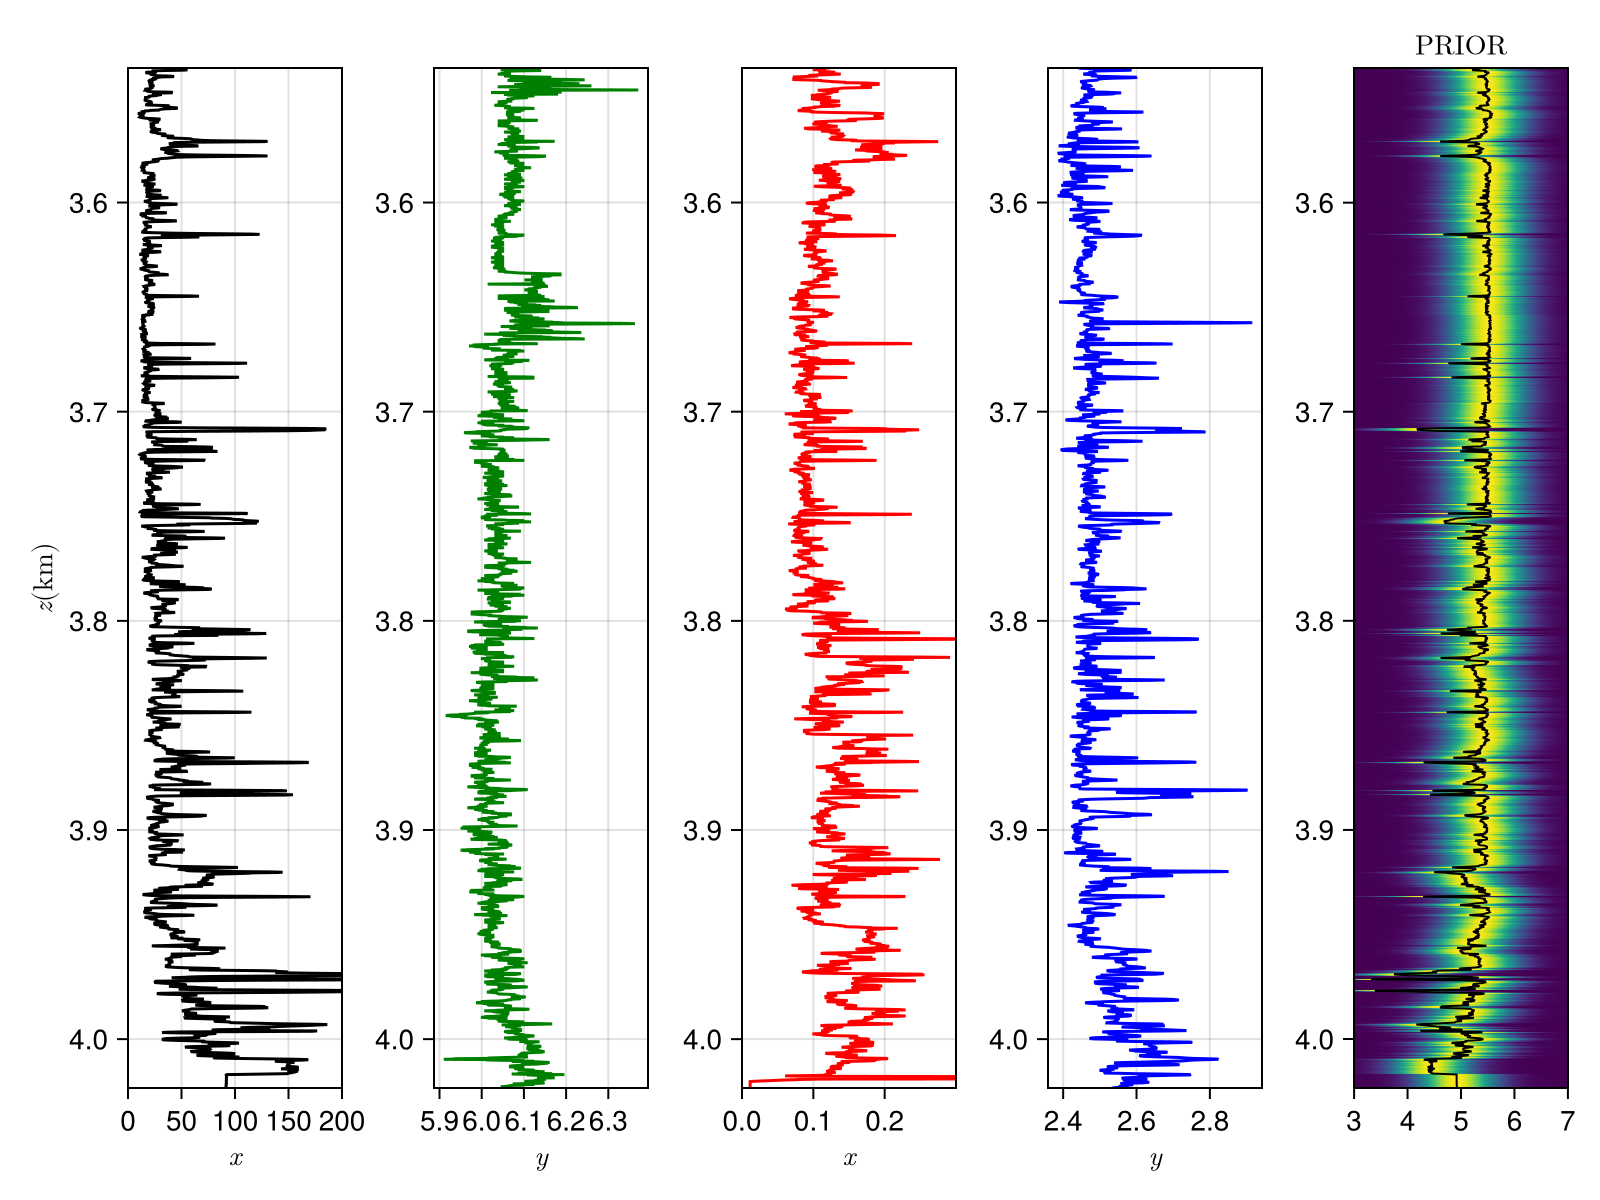

In [15]:
fig = Figure(size=(800, 600))
ax1 = Axis(fig[1, 1], xlabel=L"x", ylabel=L"z\text{(km)}")
ax2 = Axis(fig[1, 2], xlabel=L"y")
ax3 = Axis(fig[1, 3], xlabel=L"x")
ax4 = Axis(fig[1, 4], xlabel=L"y")
ax5 = Axis(fig[1,5], yreversed=true, title=L"\text{PRIOR}")

lines!(ax1, γ,   z, color=:black)
xlims!(ax1, 0, 200)
ylims!(ax1, maximum(z), minimum(z))
lines!(ax2, cali, z, color=:green)
ylims!(ax2, maximum(z), minimum(z))
lines!(ax3, ϕ, z, color=:red)
xlims!(ax3, 0, 0.3)
ylims!(ax3, maximum(z), minimum(z))
lines!(ax4, δ, z, color=:blue)
ylims!(ax4, maximum(z), minimum(z))

hm=heatmap!(ax5, v, z, g_v')
lines!(ax5, v̄, z, linewidth=1, color=:black)
# Colorbar(fig[1,2], hm)

fig

**Prior marginal data PDF**

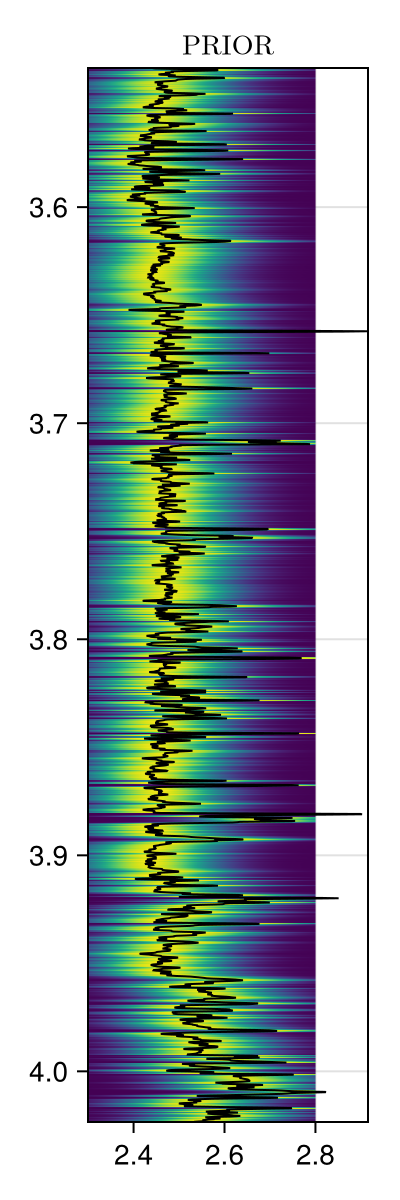

In [16]:
# compute dispersion
cmax = 8 # max allowed caliper
cref = 6 # reference caliper
a_delta = 0.1 #minimum uncertainty
a_theta = 0.1
b_delta = LinRange(0.05, 0.07, length(cali))
b_theta = LinRange(1, 2, length(cali))

σ_delta = a_delta .+ (cali .- cref)/(cmax-cref) .* b_delta
σ_theta = a_theta .+ (cali .- cref)/(cmax-cref) .* b_theta

σ_delta_maxtrix = zeros(n, n_x)
σ_theta_maxtrix = zeros(n, n_x)
σ_delta_row = LinRange(2.3, 2.8, n_x)
σ_theta_row = LinRange(0, 0.3, n_x)
for i in 1:n
    σ_delta_maxtrix[i, :] .= σ_delta_row
end

# # g_delta
g_delta = 1 ./(σ_delta * √(2π)) .* exp.(-0.5*(σ_delta_maxtrix.-δ).^2 ./σ_delta.^2);

fig = Figure(size=(200, 600))
ax5 = Axis(fig[1,1], yreversed=true, title=L"\text{PRIOR}")
hm=heatmap!(ax5, σ_delta_row, z, g_delta')
lines!(ax5, δ, z, linewidth=1, color=:black)
fig